In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## Problem 1:

### Question 1.1:

In [2]:
cnbe = pd.read_excel('Election_Data.xlsx',sheet_name=1)   # reading the excel election dataset

In [3]:
cnbe.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [4]:
cnbe.drop(columns='Unnamed: 0', inplace=True)       # removing unwanted column

In [5]:
cnbe.head()                                         # top 5 rows to check if column is removed

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [6]:
cnbe.shape                    # shape of the dataframe, (rows,columns)

(1525, 9)

In [7]:
cnbe.info()                   # checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


2 object and 7 numeric type variables 

In [8]:
cnbe.describe(include='all').T               # descriptive statistics for each variable

count unique     top  freq     mean       std  min  \
vote                     1525      2  Labour  1063      NaN       NaN  NaN   
age                      1525    NaN     NaN   NaN  54.1823   15.7112   24   
economic.cond.national   1525    NaN     NaN   NaN   3.2459  0.880969    1   
economic.cond.household  1525    NaN     NaN   NaN  3.14033  0.929951    1   
Blair                    1525    NaN     NaN   NaN  3.33443   1.17482    1   
Hague                    1525    NaN     NaN   NaN  2.74689    1.2307    1   
Europe                   1525    NaN     NaN   NaN  6.72852   3.29754    1   
political.knowledge      1525    NaN     NaN   NaN   1.5423   1.08331    0   
gender                   1525      2  female   812      NaN       NaN  NaN   

                         25%  50%  75%  max  
vote                     NaN  NaN  NaN  NaN  
age                       41   53   67   93  
economic.cond.national     3    3    4    5  
economic.cond.household    3    3    4    5  
Blair                      2    4    4    5  
Hague                      2    2    4    5  
Europe                     4    6   10   11  
political.knowledge        0    2    2    3  
gender                   NaN  NaN  NaN  NaN

In [9]:
cnbe.isnull().sum().sum()               # checked for null values

0

In [10]:
cnbe.duplicated().sum()            # checked for duplicate values

8

In [11]:
cnbe.drop_duplicates(inplace=True)  # removing duplicate values

In [12]:
cnbe.duplicated().sum()             # confirming if duplicates are removed

0

In [13]:
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(cnbe)
dfs.columns_stats.T

counts uniques missing missing_perc    types
vote                      1517       2       0           0%     bool
age                       1517      70       0           0%  numeric
economic.cond.national    1517       5       0           0%  numeric
economic.cond.household   1517       5       0           0%  numeric
Blair                     1517       5       0           0%  numeric
Hague                     1517       5       0           0%  numeric
Europe                    1517      11       0           0%  numeric
political.knowledge       1517       4       0           0%  numeric
gender                    1517       2       0           0%     bool

From the above summary table, if we go through the unique values of all the variables, we can find that except age all the other variables are having very few unique values which makes them of type discrete. Hence, we can convert the other variables to 'object' type so that the further analysis would be easy.

In [14]:
for col in cnbe.columns[2:8]:
    cnbe[col] = cnbe[col].astype('object')            # converting all discrete type variables to object types

In [15]:
cnbe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


In [16]:
cnbe['vote'].value_counts(normalize=True)            # checking percentage of classes in target variable

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [17]:
for column in cnbe.columns:                              # Unique values for categorical variables
    if cnbe[column].dtype == 'object':
        print(column.upper(),': ',cnbe[column].nunique())
        print(cnbe[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




### Question 1.2:

**Univariate analysis**

Count plots for all the categorical/object type variables

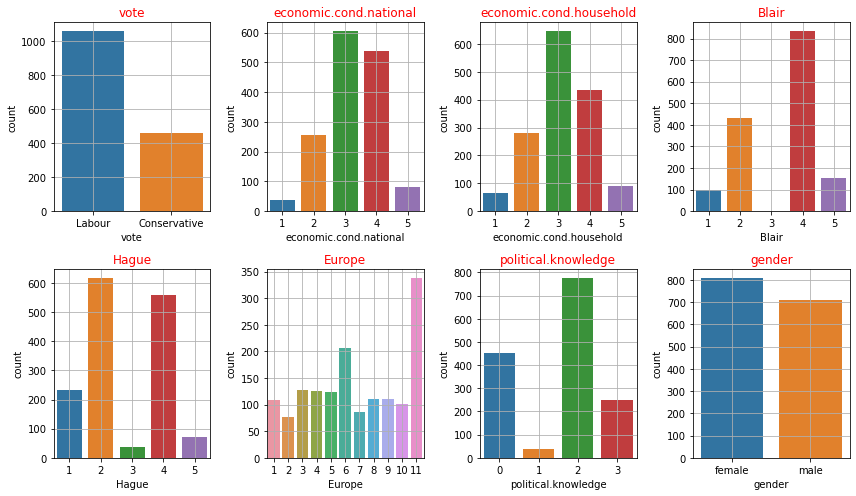

In [18]:
fig=plt.figure(figsize=(12,7))
data_plot = cnbe.select_dtypes(include='object')
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

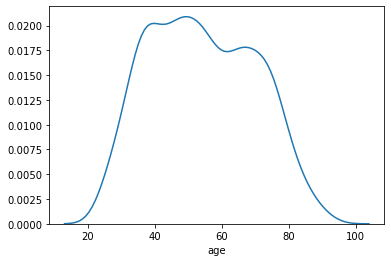

In [19]:
sns.distplot(cnbe['age'], hist=False)            # distribution plot for numeric variable age

**Bivariate Analysis**

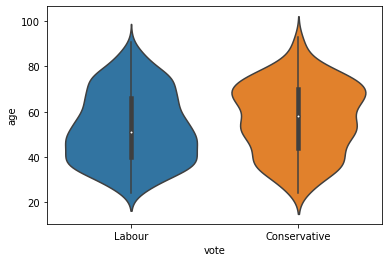

In [20]:
sns.violinplot(cnbe['vote'],cnbe['age'])         # checking distribution of age across target labels

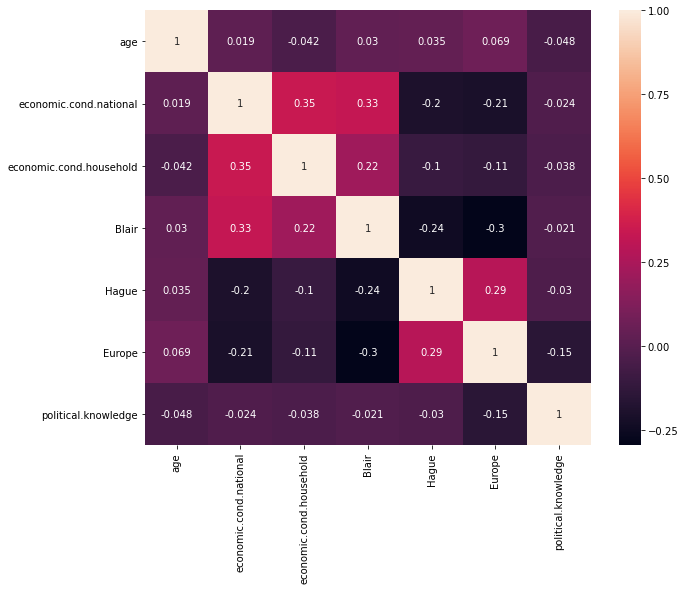

In [21]:
# correlation plot
df = pd.read_excel('Election_Data.xlsx', sheet_name=1)
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns='Unnamed: 0').corr(),annot=True)

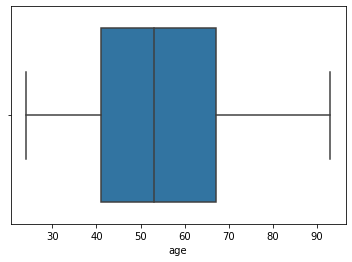

In [22]:
# as there is only one numeric variable, will check for outliers for 'age' only using boxplot
sns.boxplot(cnbe['age'])

### Question 1.3:

In [23]:
# encoding the string variables 'gender' and 'vote'
cnbe['gender'] = pd.Categorical(cnbe['gender']).codes
cnbe['vote'] = pd.Categorical(cnbe['vote']).codes

In [24]:
cnbe.vote.value_counts()      # 1 for 'labour' and 0 for 'Conservative'

1    1057
0     460
Name: vote, dtype: int64

In [25]:
cnbe.gender.value_counts()     # 1 for 'male' and 0 for 'female'

0    808
1    709
Name: gender, dtype: int64

In [26]:
for col in cnbe.columns:           # changing the object variables back to integer for model building
    if cnbe[col].dtype=='object':
        cnbe[col] = cnbe[col].astype('int64')
cnbe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 137.8 KB


In [27]:
# splitting the data into train and test
X = cnbe.drop('vote',axis=1)
y = cnbe.vote
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [28]:
# scaling the train and test data
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

### Question 1.4

### Logistic regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lrpred_train = lr.predict(X_train)
lrpred_test = lr.predict(X_test)

In [33]:
# for training data
print(confusion_matrix(y_train,lrpred_train))
print(classification_report(y_train,lrpred_train))

[[199 108]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [34]:
# for test data
print(confusion_matrix(y_test,lrpred_test))
print(classification_report(y_test,lrpred_test))

[[110  43]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.890


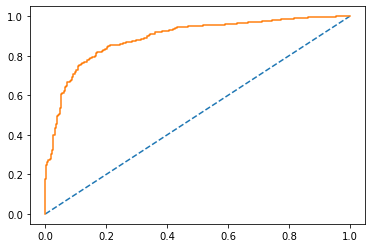

In [35]:
# AUC score and ROC curve for training data
# predict probabilities
probs = lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.879


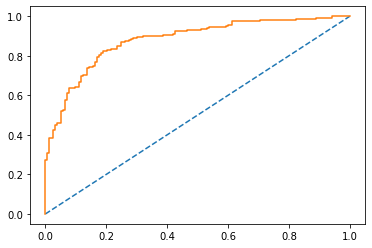

In [36]:
# AUC score and ROC curve for test data
# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Linear Discriminant Analysis Model

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [38]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [39]:
ldapred_train = lda.predict(X_train)
ldapred_test = lda.predict(X_test)

In [40]:
# for training data
print(confusion_matrix(y_train,ldapred_train))
print(classification_report(y_train,ldapred_train))

[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [41]:
# for test data
print(confusion_matrix(y_test,ldapred_test))
print(classification_report(y_test,ldapred_test))

[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.889


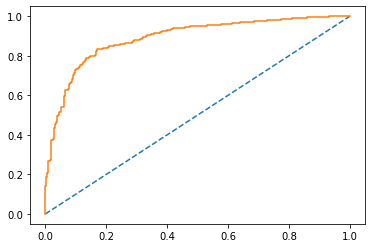

In [42]:
# AUC score and ROC curve for training data
# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.888


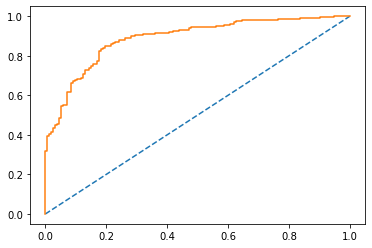

In [43]:
# AUC score and ROC curve for test data
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Question 1.5:

### K Nearest Neighbors Model

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [240]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [241]:
knnpred_train = knn.predict(X_train)
knnpred_test = knn.predict(X_test)

In [242]:
# for training data
print(confusion_matrix(y_train,knnpred_train))
print(classification_report(y_train,knnpred_train))

[[204 103]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [243]:
# for test data
print(confusion_matrix(y_test,knnpred_test))
print(classification_report(y_test,knnpred_test))

[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC: 0.923


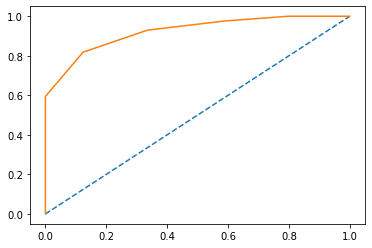

In [49]:
# AUC score and ROC curve for training data
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.852


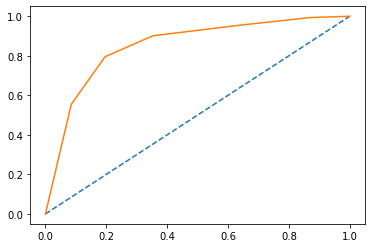

In [50]:
# AUC score and ROC curve for test data
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Naive Bayes Model

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
nbpred_train = nb.predict(X_train)
nbpred_test = nb.predict(X_test)

In [54]:
# for training data
print(confusion_matrix(y_train,nbpred_train))
print(classification_report(y_train,nbpred_train))

[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [55]:
# for test data
print(confusion_matrix(y_test,nbpred_test))
print(classification_report(y_test,nbpred_test))

[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


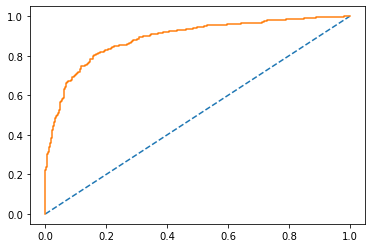

In [56]:
# AUC score and ROC curve for training data
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.876


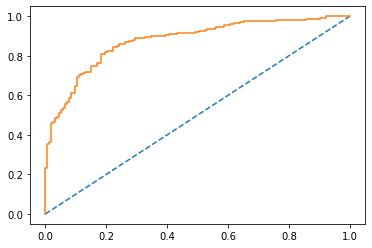

In [57]:
# AUC score and ROC curve for test data
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Support Vector Machine

In [251]:
from sklearn.svm import SVC
svm = SVC(probability=True)         # probability True to get the ROC and AUC

In [252]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [184]:
svmpred_train = svm.predict(X_train)
svmpred_test = svm.predict(X_test)

In [185]:
# for training data
print(confusion_matrix(y_train,svmpred_train))
print(classification_report(y_train,svmpred_train))

[[ 26 281]
 [  3 751]]
              precision    recall  f1-score   support

           0       0.90      0.08      0.15       307
           1       0.73      1.00      0.84       754

    accuracy                           0.73      1061
   macro avg       0.81      0.54      0.50      1061
weighted avg       0.78      0.73      0.64      1061



In [186]:
# for test data
print(confusion_matrix(y_test,svmpred_test))
print(classification_report(y_test,svmpred_test))

[[ 12 141]
 [  2 301]]
              precision    recall  f1-score   support

           0       0.86      0.08      0.14       153
           1       0.68      0.99      0.81       303

    accuracy                           0.69       456
   macro avg       0.77      0.54      0.48       456
weighted avg       0.74      0.69      0.59       456



AUC: 0.878


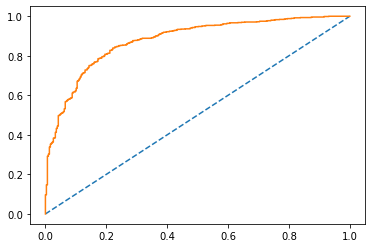

In [187]:
# AUC score and ROC curve for training data
# predict probabilities
probs = svm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.886


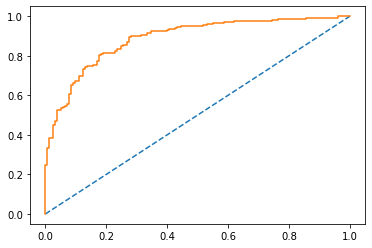

In [188]:
# AUC score and ROC curve for test data
# predict probabilities
probs = svm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Question 1.6:

### Bagging model

In [175]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
rfc = RandomForestClassifier()
bg = BaggingClassifier(rfc)

In [176]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [177]:
bgpred_train = bg.predict(X_train)
bgpred_test = bg.predict(X_test)

In [178]:
# for training data
print(confusion_matrix(y_train,bgpred_train))
print(classification_report(y_train,bgpred_train))

[[276  31]
 [ 10 744]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.96      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



In [179]:
# for test data
print(confusion_matrix(y_test,bgpred_test))
print(classification_report(y_test,bgpred_test))

[[103  50]
 [ 24 279]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.74       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



AUC: 0.995


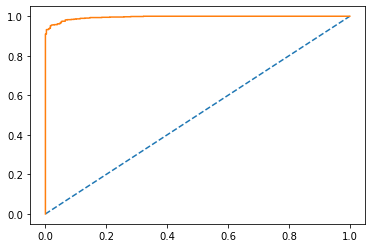

In [180]:
# AUC score and ROC curve for training data
# predict probabilities
probs = bg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.897


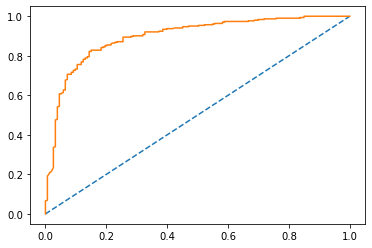

In [181]:
# AUC score and ROC curve for test data
# predict probabilities
probs = bg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Boosting models

#### AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [73]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [74]:
adapred_train = ada.predict(X_train)
adapred_test = ada.predict(X_test)

In [75]:
# for training data
print(confusion_matrix(y_train,adapred_train))
print(classification_report(y_train,adapred_train))

[[210  97]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [76]:
# for test data
print(confusion_matrix(y_test,adapred_test))
print(classification_report(y_test,adapred_test))

[[105  48]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.912


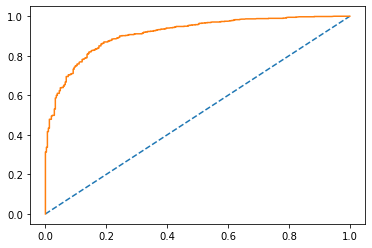

In [77]:
# AUC score and ROC curve for training data
# predict probabilities
probs = ada.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.881


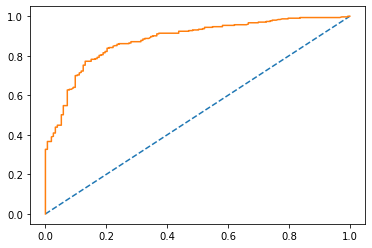

In [78]:
# AUC score and ROC curve for test data
# predict probabilities
probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### GradientBoost

In [255]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [256]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
gbpred_train = gb.predict(X_train)
gbpred_test = gb.predict(X_test)

In [224]:
# for training data
print(confusion_matrix(y_train,gbpred_train))
print(classification_report(y_train,gbpred_train))

[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [83]:
# for test data
print(confusion_matrix(y_test,gbpred_test))
print(classification_report(y_test,gbpred_test))

[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.951


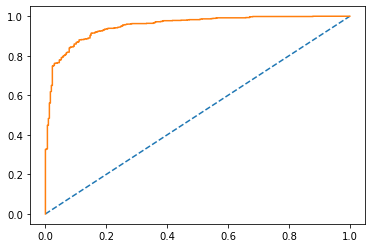

In [84]:
# AUC score and ROC curve for training data
# predict probabilities
probs = gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.898


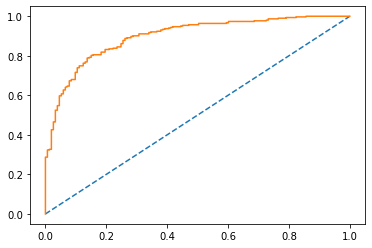

In [85]:
# AUC score and ROC curve for test data
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### XGBoost 

In [257]:
import xgboost as xgb

In [258]:
xgb = xgb.XGBClassifier(random_state=1)

In [259]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
xgbpred_train = xgb.predict(X_train)
xgbpred_test = xgb.predict(X_test)

In [90]:
# for training data
print(confusion_matrix(y_train,xgbpred_train))
print(classification_report(y_train,xgbpred_train))

[[306   1]
 [  1 753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [91]:
# for test data
print(confusion_matrix(y_test,xgbpred_test))
print(classification_report(y_test,xgbpred_test))

[[112  41]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 1.000


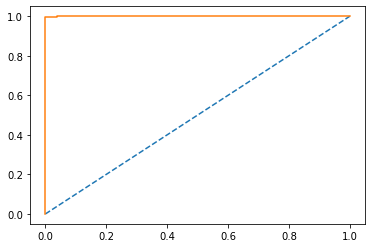

In [92]:
# AUC score and ROC curve for training data
# predict probabilities
probs = xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.887


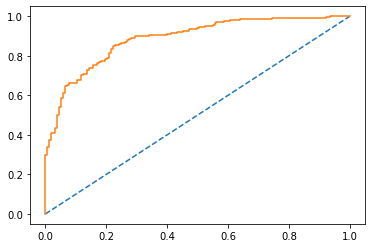

In [93]:
# AUC score and ROC curve for test data
# predict probabilities
probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Model Tuning using GridSearhCV

**For Bagging**

In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth': [5,7],
    'max_features': [6,8],
    'base_estimator__min_samples_leaf': [5,10],
    'base_estimator__min_samples_split': [15,50],
    'n_estimators': [100,150]
}

rfcl = RandomForestClassifier()
bg = BaggingClassifier(rfcl)

grid_search = GridSearchCV(estimator = bg, param_grid = param_grid, cv = 3)

In [132]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                               ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features='auto',
                                                                               max_leaf_nodes=None,
                                                                               max_samples=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min

In [133]:
grid_search.best_params_

{'base_estimator__max_depth': 7,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__min_samples_split': 15,
 'max_features': 8,
 'n_estimators': 150}

In [134]:
best_grid_bag = grid_search.best_estimator_

In [135]:
grid_bgpred_train = best_grid_bag.predict(X_train)
grid_bgpred_test = best_grid_bag.predict(X_test)

In [136]:
# for training data
print(confusion_matrix(y_train,grid_bgpred_train))
print(classification_report(y_train,grid_bgpred_train))

[[207 100]
 [ 45 709]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       307
           1       0.88      0.94      0.91       754

    accuracy                           0.86      1061
   macro avg       0.85      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [137]:
# for test data
print(confusion_matrix(y_test,grid_bgpred_test))
print(classification_report(y_test,grid_bgpred_test))

[[ 99  54]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.71       153
           1       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



AUC: 0.928


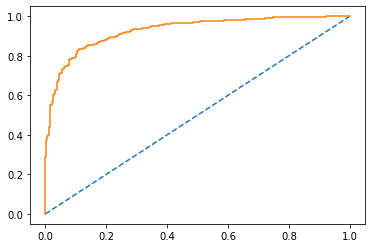

In [138]:
# AUC score and ROC curve for training data
# predict probabilities
probs = best_grid_bag.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.894


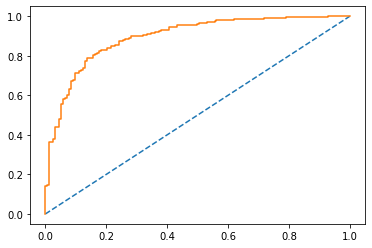

In [139]:
# AUC score and ROC curve for test data
# predict probabilities
probs = best_grid_bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

**For Boosting: AdaBoost**

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.1,0.01,1]
}

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

grid_search = GridSearchCV(estimator = ad, param_grid = param_grid, cv = 3)

In [141]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 1],
                         'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [142]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [143]:
best_grid_ada = grid_search.best_estimator_

In [144]:
grid_adapred_train = best_grid_ada.predict(X_train)
grid_adapred_test = best_grid_ada.predict(X_test)

In [145]:
# for training data
print(confusion_matrix(y_train,grid_adapred_train))
print(classification_report(y_train,grid_adapred_train))

[[187 120]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [146]:
# for test data
print(confusion_matrix(y_test,grid_adapred_test))
print(classification_report(y_test,grid_adapred_test))

[[ 99  54]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.902


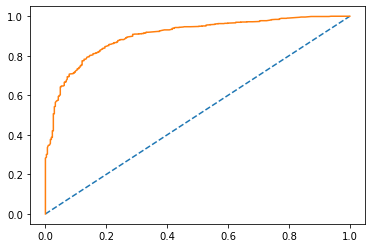

In [147]:
# AUC score and ROC curve for training data
# predict probabilities
probs = best_grid_ada.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.885


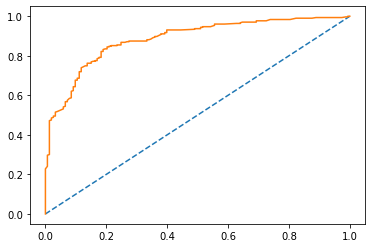

In [148]:
# AUC score and ROC curve for test data
# predict probabilities
probs = best_grid_ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

**For Boosting: Gradient Boost**

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.1,0.01,0.001,1],
    'min_samples_leaf': [5,10],
    'min_samples_split': [15,30],
    'max_depth': [6,8]
}

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3)

In [166]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [167]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 200}

In [168]:
best_grid_gb = grid_search.best_estimator_

In [169]:
grid_gbpred_train = best_grid_gb.predict(X_train)
grid_gbpred_test = best_grid_gb.predict(X_test)

In [170]:
# for training data
print(confusion_matrix(y_train,grid_gbpred_train))
print(classification_report(y_train,grid_gbpred_train))

[[231  76]
 [ 40 714]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       307
           1       0.90      0.95      0.92       754

    accuracy                           0.89      1061
   macro avg       0.88      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



In [171]:
# for test data
print(confusion_matrix(y_test,grid_gbpred_test))
print(classification_report(y_test,grid_gbpred_test))

[[105  48]
 [ 23 280]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       153
           1       0.85      0.92      0.89       303

    accuracy                           0.84       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.956


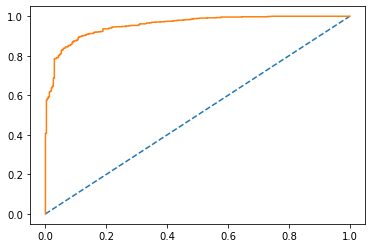

In [172]:
# AUC score and ROC curve for training data
# predict probabilities
probs = best_grid_gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.897


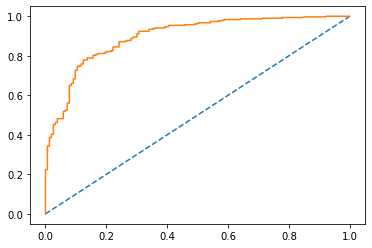

In [173]:
# AUC score and ROC curve for test data
# predict probabilities
probs = best_grid_gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

**For Boosting: XGBoost**

In [226]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

import xgboost as xgb
xgb = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3)

In [227]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [228]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 1.0}

In [229]:
best_grid_xgb = grid_search.best_estimator_

In [230]:
grid_xgbpred_train = best_grid_xgb.predict(X_train)
grid_xgbpred_test = best_grid_xgb.predict(X_test)

In [231]:
# for training data
print(confusion_matrix(y_train,grid_xgbpred_train))
print(classification_report(y_train,grid_xgbpred_train))

[[299   8]
 [  2 752]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       307
           1       0.99      1.00      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



In [232]:
# for test data
print(confusion_matrix(y_test,grid_xgbpred_test))
print(classification_report(y_test,grid_xgbpred_test))

[[109  44]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 1.000


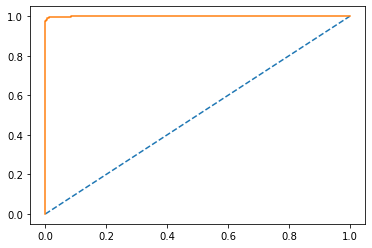

In [233]:
# AUC score and ROC curve for training data
# predict probabilities
probs = best_grid_xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.889


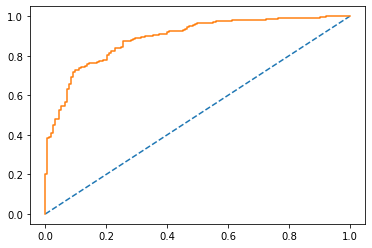

In [234]:
# AUC score and ROC curve for test data
# predict probabilities
probs = best_grid_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

**K Nearest Neighbor**

In [196]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,5,7,9]
}

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3)

In [197]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [198]:
grid_search.best_params_

{'n_neighbors': 5}

Since the best parameter value is same as the default value for KNN model, there is no need for further steps. As they are already performed above

**Support Vector Machine**

In [213]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [5.0,7.0,9.0,15.0,18.0,20.0]
}

from sklearn.svm import SVC
svm = SVC(probability=True)

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, cv = 3)

In [214]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5.0, 7.0, 9.0, 15.0, 18.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [215]:
grid_search.best_params_

{'C': 15.0}

In [216]:
best_grid_svc = grid_search.best_estimator_

In [218]:
grid_svcpred_train = best_grid_svc.predict(X_train)
grid_svcpred_test = best_grid_svc.predict(X_test)

In [219]:
# for training data
print(confusion_matrix(y_train,grid_svcpred_train))
print(classification_report(y_train,grid_svcpred_train))

[[196 111]
 [ 58 696]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [220]:
# for test data
print(confusion_matrix(y_test,grid_svcpred_test))
print(classification_report(y_test,grid_svcpred_test))

[[105  48]
 [ 24 279]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       153
           1       0.85      0.92      0.89       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.891


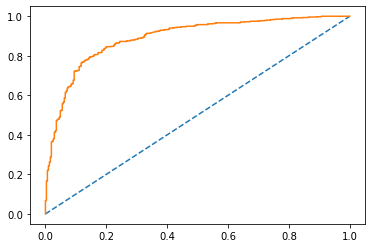

In [221]:
# AUC score and ROC curve for training data
# predict probabilities
probs = best_grid_svc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.893


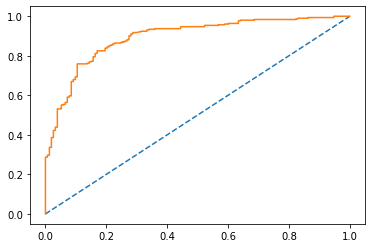

In [222]:
# AUC score and ROC curve for test data
# predict probabilities
probs = best_grid_svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Question 1.7:

### comparing model accuracies

In [287]:
# created list with models and model names
models = [lr,lda,knn,nb,svm,bg,ada,gb,xgb, best_grid_bag, best_grid_ada, best_grid_gb, best_grid_xgb, best_grid_svc]
model_names = ['Logistic Regression', 'Linear Discriminant Analysis', 'K Nearest Neighbors', 'Naive Bayes', 
                'Support Vector Machine', 'Bagging Classifier', 'AdaBoost', 'Gradient Boost', 'XGBoost', 
                'Bagging with Tuning', 'AdaBoost with Tuning', 'Gradient Boost with Tuning', 'XGBoost with Tuning', 
                'SVM with Tuning']
len(models_names) == len(models)

True

In [288]:
len(models)

14

In [280]:
accuracy = []               # list to store accuracy scores for all the models
for m in models:
    accuracy.append(round(m.score(X_test,y_test)*100,2))

In [282]:
acc = pd.DataFrame(data=accuracy, index=model_names, columns=['Accuracy'])

In [285]:
acc

Accuracy
Logistic Regression              82.46
Linear Discriminant Analysis     83.33
K Nearest Neighbors              81.58
Naive Bayes                      82.24
Support Vector Machine           68.64
Bagging Classifier               83.77
AdaBoost                         81.36
Gradient Boost                   83.55
XGBoost                          82.46
Bagging with Tuning              82.68
AdaBoost with Tuning             80.92
Gradient Boost with Tuning       84.43
XGBoost with Tuning              82.46
SVM with Tuning                  84.21

In [289]:
best_grid_svc.score(X_test,y_test)

0.8421052631578947

In [290]:
best_grid_svc.score(X_train,y_train)

0.8407163053722903

Best/most optimized model is SVM with optimal hyperparameters

### Question 1.8:

In [316]:
vote_prediction = grid_svcpred_train          # storing train data prediction(given by SVM-tuned model) in a variable

In [317]:
df = X_train.copy()                        # getting copy of the train data features

In [318]:
df.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
991    34                       2                        4      1      4   
1274   40                       4                        3      4      4   
649    61                       4                        3      4      4   
677    47                       3                        3      4      2   
538    44                       5                        3      4      2   

      Europe  political.knowledge  gender  
991       11                    2       0  
1274       6                    0       1  
649        7                    2       0  
677       11                    0       1  
538        8                    0       1

In [319]:
df['vote_prediction'] = vote_prediction              # adding new column with prediction values

In [320]:
df.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
991    34                       2                        4      1      4   
1274   40                       4                        3      4      4   
649    61                       4                        3      4      4   
677    47                       3                        3      4      2   
538    44                       5                        3      4      2   

      Europe  political.knowledge  gender  vote_prediction  
991       11                    2       0                0  
1274       6                    0       1                1  
649        7                    2       0                1  
677       11                    0       1                1  
538        8                    0       1                1

In [321]:
Labour = df[df['vote_prediction']==1]               # new dataframe with prediction as Labour party
Conservative = df[df['vote_prediction']==0]         # new dataframe with prediction as Conservative party

In [322]:
Labour.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
1274   40                       4                        3      4      4   
649    61                       4                        3      4      4   
677    47                       3                        3      4      2   
538    44                       5                        3      4      2   
62     28                       4                        1      4      2   

      Europe  political.knowledge  gender  vote_prediction  
1274       6                    0       1                1  
649        7                    2       0                1  
677       11                    0       1                1  
538        8                    0       1                1  
62         6                    2       0                1

In [323]:
Conservative.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
991   34                       2                        4      1      4   
316   55                       3                        3      4      4   
651   59                       5                        3      2      4   
841   64                       3                        1      2      4   
189   75                       3                        5      4      4   

     Europe  political.knowledge  gender  vote_prediction  
991      11                    2       0                0  
316      11                    3       1                0  
651      11                    0       0                0  
841      11                    0       0                0  
189       8                    3       1                0

In [ ]:
# value counts of different scores for different variables- for both Labour and Conservative dataframes

In [324]:
Labour['economic.cond.national'].value_counts()       

4    331
3    329
2     91
5     48
1      8
Name: economic.cond.national, dtype: int64

In [325]:
Conservative['economic.cond.national'].value_counts()

3    118
2     73
4     42
1     17
5      4
Name: economic.cond.national, dtype: int64

In [329]:
Labour['Blair'].value_counts()

4    529
2    153
5    109
1     16
Name: Blair, dtype: int64

In [330]:
Conservative['Blair'].value_counts()

2    149
4     56
1     47
5      2
Name: Blair, dtype: int64

In [331]:
Labour['Hague'].value_counts()

2    416
4    198
1    164
3     20
5      9
Name: Hague, dtype: int64

In [332]:
Conservative['Hague'].value_counts()

4    182
5     43
2     21
3      6
1      2
Name: Hague, dtype: int64

In [333]:
Labour['Europe'].value_counts()

6     150
11     94
4      88
3      82
5      74
1      74
2      61
8      59
7      53
9      42
10     30
Name: Europe, dtype: int64

In [334]:
Conservative['Europe'].value_counts()

11    130
10     35
9      35
8      16
7      15
6      10
5       8
4       3
3       2
Name: Europe, dtype: int64

## Problem 2:
### Question 2.1:

In [94]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')                    # storing the speeches in separate variables to process them

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Pranav\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [95]:
from wordcloud import WordCloud, STOPWORDS #calling WordCloud and Stopwords
from nltk.tokenize import word_tokenize #word tokenizer

In [96]:
inaugurals = [roosevelt, kennedy, nixon]         # creating list of speeches' variables

In [97]:
n_characters = [len(x) for x in inaugurals]     # storing number of characters of each speech in a list called characters

In [98]:
print('Number of characters in 1941-Roosevelt: ',n_characters[0])
print('Number of characters in 1961-Kennedy: ',n_characters[1])
print('Number of characters in 1973-Nixon: ',n_characters[2])

Number of characters in 1941-Roosevelt:  7571
Number of characters in 1961-Kennedy:  7618
Number of characters in 1973-Nixon:  9991


In [99]:
n_words = [len(x.split(" ")) for x in inaugurals]

In [100]:
n_words

[1323, 1364, 1769]

In [101]:
print('Number of words in 1941-Roosevelt: ',n_words[0])
print('Number of words in 1961-Kennedy: ',n_words[1])
print('Number of words in 1973-Nixon: ',n_words[2])

Number of words in 1941-Roosevelt:  1323
Number of words in 1961-Kennedy:  1364
Number of words in 1973-Nixon:  1769


In [102]:
n_sentences = [len(x.split(".")) for x in inaugurals]

In [103]:
n_sentences

[69, 56, 70]

In [104]:
print('Number of sentences in 1941-Roosevelt: ',n_sentences[0])
print('Number of sentences in 1961-Kennedy: ',n_sentences[1])
print('Number of sentences in 1973-Nixon: ',n_sentences[2])

Number of sentences in 1941-Roosevelt:  69
Number of sentences in 1961-Kennedy:  56
Number of sentences in 1973-Nixon:  70


### Question 2.2:

**Removing Stopwords**

In [105]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [106]:
# using list comprehension to exclude stopwords
roose = [x for x in roosevelt.lower().split() if x not in stop]
kenn = [x for x in kennedy.lower().split() if x not in stop]
nix = [x for x in nixon.lower().split() if x not in stop]

In [107]:
# using join to convert the list back into the speech document
roosevelt = " ".join(roose)
kennedy = " ".join(kenn)
nixon = " ".join(nix)

### Question 2.3:

**Most frequent words**

In [108]:
import re
import string
inaug = [roosevelt,kennedy,nixon]

**Preprocessing the speeches**

In [109]:
# before counting the words, we should remove special characters, unnecessary texts, etc.
processed_features = []

for speech in inaug:
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', speech)

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Removing
    text = re.sub('\[.*?\]', '', processed_feature)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[^a-z, ,]','',text)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [110]:
processed_roose = processed_features[0]
processed_kenn = processed_features[1]
processed_nix = processed_features[2]

In [111]:
import pandas as pd

In [112]:
sroose = pd.Series(processed_roose.split())
skenn = pd.Series(processed_kenn.split())
snix = pd.Series(processed_nix.split())

In [348]:
sroose.value_counts().sort_values(ascending=False).head(6)

nation       12
know         10
life          9
democracy     9
spirit        9
us            8
dtype: int64

In [350]:
skenn.value_counts().sort_values(ascending=False).head()

let       16
us        12
sides      8
world      8
pledge     7
dtype: int64

In [352]:
snix.value_counts().sort_values(ascending=False).head()

us         26
let        22
america    21
peace      19
world      18
dtype: int64

### Question 2.4:

### Word clouds

**For Roosevelt**

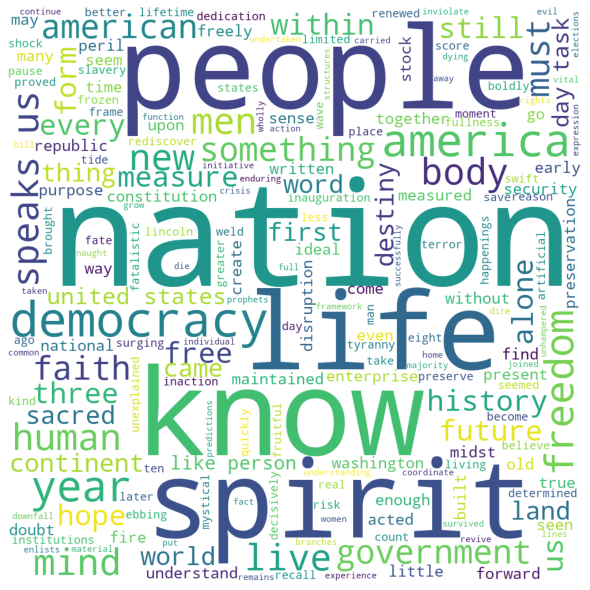

In [116]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in [processed_roose]: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

**For Kennedy**

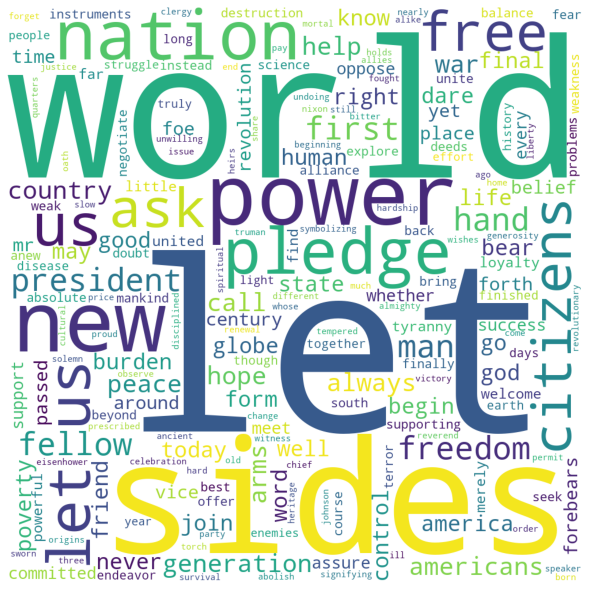

In [117]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in [processed_kenn]: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

**For Nixon**

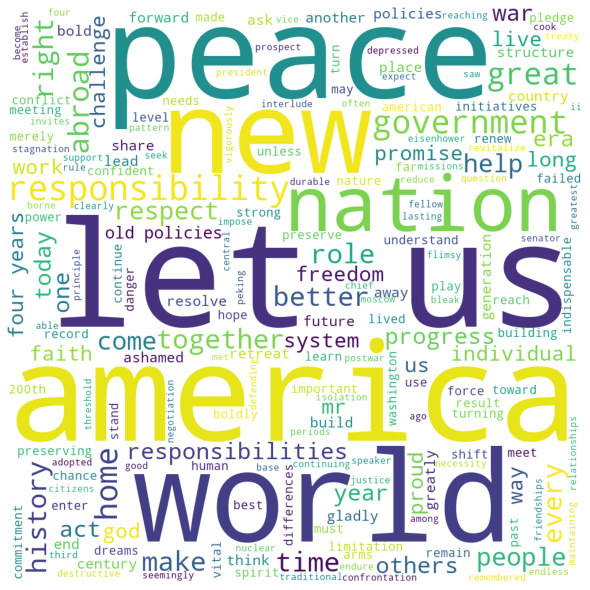

In [118]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in [processed_nix]: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 